In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gate import AddGate, MultiplyGate, DotGate, BiasGate, SigmoidGate, ReluGate, SoftmaxGate

In [2]:
np.random.seed(1)

In [3]:
def LoadDataSet():
    DataMatrix = []
    LabelList = []
    fr = open('dataset.txt')
    for line in fr.readlines():
        LineArray = line.strip().split()
        DataMatrix.append([float(LineArray[0]), float(LineArray[1])])
        LabelList.append(int(LineArray[2]))
        pass
    DataMatrix = np.mat(DataMatrix)
    DataMatrix = DataMatrix.T
    return DataMatrix, LabelList

### Using Sigmoid

In [4]:
X, Y = LoadDataSet()
Y = np.array(Y)

In [5]:
n,m = np.shape(X)
print(n, m)

2 100


In [6]:
W = np.random.randn(1, n)
b = 0

In [7]:
def PlotLine(W, b):
    W = np.array(W)
    DataList = []
    LabelList = []
    fr = open('dataset.txt')
    for line in fr.readlines():
        LineArray = line.strip().split()
        DataList.append([float(LineArray[0]), float(LineArray[1])])
        LabelList.append(int(LineArray[2]))  
    DataArray = np.array(DataList)
    n = np.shape(DataArray)[0]
    Weights = np.squeeze(W)
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(LabelList[i])==1:
            xcord1.append(DataArray[i,0])
            ycord1.append(DataArray[i,1])
        else:
            xcord2.append(DataArray[i,0])
            ycord2.append(DataArray[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x1 = np.arange(-3.0, 3.0, 0.1)
    x2 = np.squeeze(-(b+Weights[0]*x1)/Weights[1])
    ax.plot(x1,x2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    pass

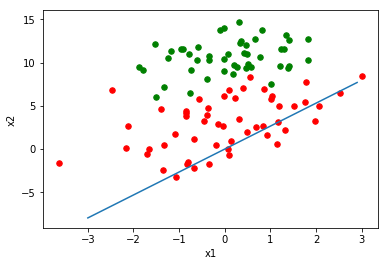

In [8]:
PlotLine(W, b)

In [9]:
dot = DotGate()
bias = BiasGate()
sigmoid = SigmoidGate()
softmax = SoftmaxGate()

In [10]:
for i in range(500):
    Q = dot.forward(W, X)
    Z = bias.forward(Q, b)
    A = sigmoid.forward(Z)
    logprobs = np.multiply(-np.log(A),Y) + \
    np.multiply(-np.log(1 - A), 1 - Y)
    cost = 1.0/m * np.nansum(logprobs)
    cost = np.squeeze(cost)
    dA = -(Y/A) + (1-Y)/(1-A)
    dZ = sigmoid.backward(dA)
    dQ, db = bias.backward(dZ)
    dW, _ = dot.backward(dQ)
    W = W - 0.5*dW
    b = b - 0.5*db
    if i%10==0:
        print(cost)
        pass
    pass

1.1713167375551758
1.0349731921097876
0.5058986114806029
0.8117914584103992
0.4118441201470972
0.4119308705037264
0.9393956536915299
0.33570710738917486
0.2986878169025962
0.20222748489860526
0.24950259661232457
0.21454960714309448
0.21112597162131166
0.2014065811275464
0.19265048083710337
0.1844191859017477
0.17666581946241544
0.16935271309377622
0.16245530110980685
0.15596544912695615
0.14989764196346894
0.14429957685707273
0.13926654465530347
0.13494935997246632
0.13152355708372857
0.12907919514001961
0.12748386992088948
0.1264138560569886
0.12557180416190097
0.12481138284456167
0.12408935297500494
0.12339652856163802
0.12273036780709505
0.12208925718763317
0.12147177235578605
0.12087660335657364
0.12030253912169245
0.11974845742015866
0.11921331644562087
0.1186961474964786
0.11819604851048307
0.11771217830726605
0.1172437514357946
0.1167900335475108
0.11635033723063697
0.11592401825137766
0.11551047215553104
0.11510913119027338
0.11471946151107075
0.11434096064306123


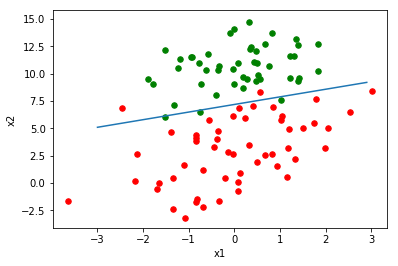

0.11400946735099542


In [11]:
PlotLine(W, b)
print(cost)

### Using Softmax

In [12]:
X, Ys = LoadDataSet()
Ys = np.array(Ys)
Y = []
for y in Ys:
    if y == 0:
        Y.append([1, 0])
        pass
    else:
        Y.append([0, 1])
        pass
    pass
Y = np.array(Y).T

n,m = np.shape(X)
print(Y)

[[1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
  1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0
  1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0
  0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1
  0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0]]


In [13]:
W = np.random.randn(2, n)
b = np.zeros((2, 1))

In [14]:
def PlotLine2(W, b):
    W = np.array(W)
    DataList = []
    LabelList = []
    fr = open('dataset.txt')
    for line in fr.readlines():
        LineArray = line.strip().split()
        DataList.append([float(LineArray[0]), float(LineArray[1])])
        LabelList.append(int(LineArray[2]))  
    DataArray = np.array(DataList)
    n = np.shape(DataArray)[0]
    Weights = np.squeeze(W)
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(LabelList[i])==1:
            xcord1.append(DataArray[i,0])
            ycord1.append(DataArray[i,1])
        else:
            xcord2.append(DataArray[i,0])
            ycord2.append(DataArray[i,1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x1 = np.arange(-3.0, 3.0, 0.1)
    x2 = np.squeeze(-((b[0][0]-b[1][0])+(Weights[0][0]-Weights[1][0])*x1)\
                    /(Weights[0][1]-Weights[1][1]))
    ax.plot(x1,x2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    pass

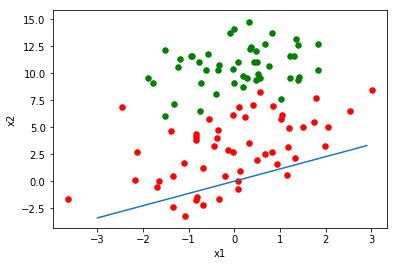

In [15]:
PlotLine2(W, b)

In [16]:
dot = DotGate()
bias = BiasGate()
sigmoid = SigmoidGate()
softmax = SoftmaxGate()

In [17]:
for i in range(500):
    Q = dot.forward(W, X)
    Z = bias.forward(Q, b)
    A = softmax.forward(Z)
    logprobs = -np.multiply(Y, np.log(A))
    cost = 1.0/m * np.nansum(logprobs)
    cost = np.squeeze(cost)
    dA = -np.squeeze((Y/A))
    dZ = softmax.backward(dA)
    dQ, db = bias.backward(dZ)
    dW, _ = dot.backward(dQ)
    W = W - 0.08*dW
    b = b - 0.08*db
    if i%10==0:
        print(cost)
        pass
    pass

2.100090459157213
0.7032943675670061
0.6246846306756954
0.5612456894221856
0.5101232617051545
0.46975799991987566
0.43819619533991516
0.4134385145836381
0.39372208424916616
0.37765632096204704
0.36422441011101114
0.3527149683003863
0.3426397994071539
0.33366434444798876
0.3255568434833546
0.31815368936496446
0.31133658650705986
0.3050176887202631
0.29912994344819466
0.29362078304526346
0.28844795982163124
0.2835767581153895
0.27897809712146093
0.27462721564965614
0.27050274167001953
0.26658601984423025
0.262860614722574
0.259311935588376
0.2559269470783459
0.25269394144394386
0.24960235598351324
0.24664262423257152
0.24380605287539261
0.24108471862122963
0.23847138084922972
0.23595940690900022
0.23354270772634367
0.23121568190881064
0.22897316694173253
0.22681039635764536
0.22472296198115474
0.22270678051830345
0.2207580638886249
0.21887329279940343
0.217049193142273
0.2152827148571002
0.21357101296099493
0.2119114304836341
0.2103014830861947
0.20873884517127586


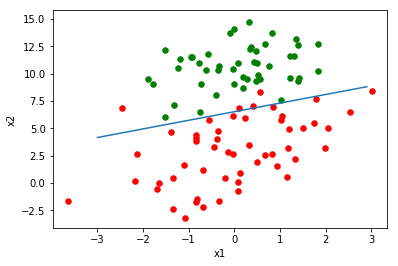

0.20737111652929308


In [18]:
PlotLine2(W, b)
print(cost)